In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



In [3]:
df = pd.read_csv('imagedataset.csv')
df.sample(5)


,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
176,imagoai_corn_176,0.402874,0.403305,0.385253,0.393690,0.397845,0.377312,0.382213,0.348654,0.346361,...,0.673915,0.662803,0.669754,0.671878,0.686866,0.661943,0.658972,0.679948,0.660812,1000.0
100,imagoai_corn_100,0.472614,0.483179,0.473928,0.467689,0.459704,0.468497,0.444642,0.449286,0.439891,...,0.799524,0.777393,0.783000,0.797162,0.794427,0.796161,0.788685,0.805513,0.811167,0.0
70,imagoai_corn_70,0.470249,0.441310,0.425001,0.428969,0.425255,0.395403,0.393627,0.392839,0.396383,...,0.716493,0.716543,0.701874,0.737628,0.703112,0.708532,0.695855,0.709494,0.716467,200.0
77,imagoai_corn_77,0.443731,0.426807,0.413414,0.414627,0.399637,0.401221,0.384591,0.391413,0.391491,...,0.805674,0.785352,0.779709,0.768302,0.770380,0.780735,0.775504,0.778851,0.785530,300.0
125,imagoai_corn_125,0.440021,0.452171,0.454981,0.452239,0.432195,0.439755,0.410487,0.427338,0.414966,...,0.904869,0.920964,0.897574,0.912240,0.912488,0.910043,0.903381,0.896148,0.893679,400.0


In [5]:
# shape of dataset
df.shape

(500, 450)

In [7]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [9]:
# check for duplicates 
df.duplicated().sum()


0

In [11]:
# check for missing values
df.isnull().sum()

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64

In [15]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [23]:
df['2'].value_counts()

2
0.408985    1
0.473918    1
0.368003    1
0.408323    1
0.464623    1
           ..
0.452812    1
0.358365    1
0.484739    1
0.454405    1
0.434632    1
Name: count, Length: 500, dtype: int64

In [25]:
# Outlier detection using IQR method
Q1 = df['vomitoxin_ppb'].quantile(0.25)
Q3 = df['vomitoxin_ppb'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['vomitoxin_ppb'] < lower_bound) | (df['vomitoxin_ppb'] > upper_bound)]

# Display detected outliers
print(f"Number of outliers detected: {outliers.shape[0]}")
print(outliers[['hsi_id', 'vomitoxin_ppb']].head())


Number of outliers detected: 80
             hsi_id  vomitoxin_ppb
11  imagoai_corn_11         8900.0
18  imagoai_corn_18         4800.0
37  imagoai_corn_37        18000.0
38  imagoai_corn_38         4300.0
50  imagoai_corn_50         5300.0


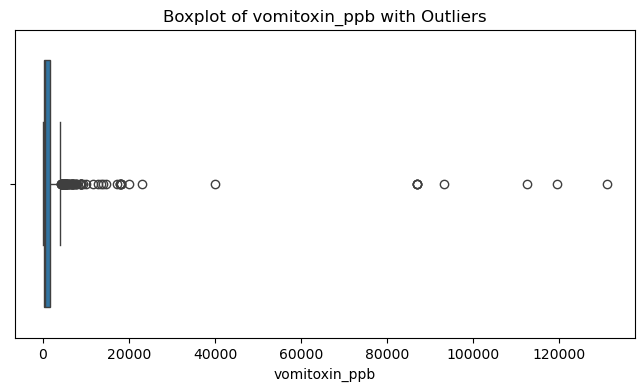

In [30]:
# Boxplot for outliers visualization
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['vomitoxin_ppb'])
plt.title('Boxplot of vomitoxin_ppb with Outliers')
plt.show()



In [42]:
# Remove outliers
df_cleaned = df[(df['vomitoxin_ppb'] >= lower_bound) & (df['vomitoxin_ppb'] <= upper_bound)]

# Display cleaned data info
print(f"Number of outliers removed: {df.shape[0] - df_cleaned.shape[0]}")
print(f"Dataset size after removing outliers: {df_cleaned.shape}")


Number of outliers removed: 80
Dataset size after removing outliers: (420, 451)


In [64]:
# Normalize 'vomitoxin_ppb' values between 0 and 1
scaler = MinMaxScaler()
df['vomitoxin_ppb_normalized'] = scaler.fit_transform(df[['vomitoxin_ppb']])

# Display the first few rows to confirm the changes
print(df[['hsi_id', 'vomitoxin_ppb', 'vomitoxin_ppb_normalized']].head())


           hsi_id  vomitoxin_ppb  vomitoxin_ppb_normalized
0  imagoai_corn_0         1100.0                  0.008397
1  imagoai_corn_1         1000.0                  0.007634
2  imagoai_corn_2         1300.0                  0.009924
3  imagoai_corn_3         1300.0                  0.009924
4  imagoai_corn_4          220.0                  0.001679


In [66]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,441,442,443,444,445,446,447,vomitoxin_ppb,vomitoxin_ppb_standardized,vomitoxin_ppb_normalized
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0,-0.176570,0.008397
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0,-0.184213,0.007634
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0,-0.161282,0.009924
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0,-0.161282,0.009924
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0,-0.243834,0.001679


In [68]:
df.drop(columns=['vomitoxin_ppb_standardized','vomitoxin_ppb'],inplace= True)

In [70]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb_normalized
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,0.008397
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,0.007634
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,0.009924
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,0.009924
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,0.001679


###VISUALISATION

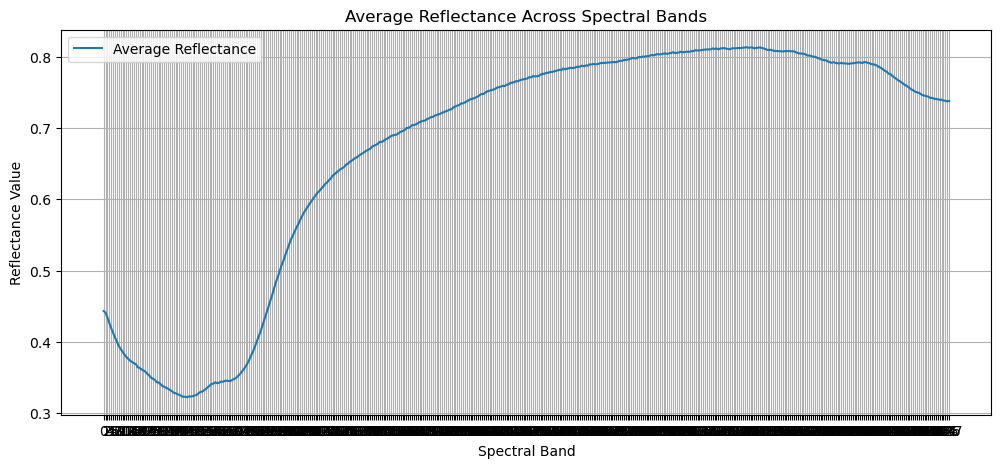

In [72]:
# Extract spectral data (assuming spectral data starts at column 1 and excludes 'hsi_id' and 'vomitoxin_ppb')
spectral_data = df.iloc[:, 1:-1]

# Line plot for average reflectance across spectral bands
avg_reflectance = spectral_data.mean()
plt.figure(figsize=(12, 5))
plt.plot(avg_reflectance, label='Average Reflectance')
plt.title('Average Reflectance Across Spectral Bands')
plt.xlabel('Spectral Band')
plt.ylabel('Reflectance Value')
plt.legend()
plt.grid(True)
plt.show()

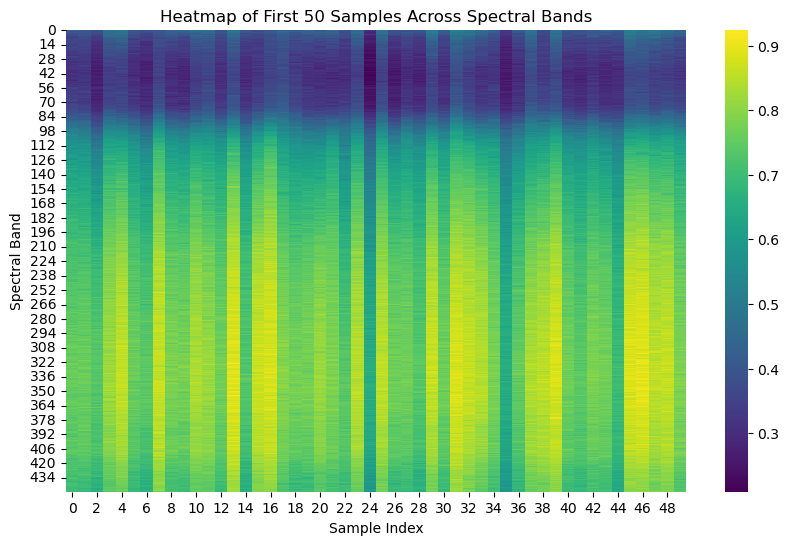

In [93]:
# Heatmap for sample comparisons
plt.figure(figsize=(10, 6))
sns.heatmap(spectral_data.iloc[:50, :].T, cmap='viridis', cbar=True)
plt.title('Heatmap of First 50 Samples Across Spectral Bands')
plt.xlabel('Sample Index')
plt.ylabel('Spectral Band')
plt.show()